In [1]:
from zipfile import ZipFile
from io import BytesIO
import pandas as pd
import pandas_profiling as pdp

zf = ZipFile('archive.zip')
b = zf.read('creditcard.csv')
X = pd.read_csv(BytesIO(b))

#X = pd.read_csv('mushroom.csv')
profile = pdp.ProfileReport(X)
profile.to_file(output_file="creditcard.html")

/home/aisskr/kaggle/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Summarize dataset:  84%|████████████████████████████████████████████▋        | 32/38 [00:06<00:00,  7.95it/s, Calculate auto correlation]/home/aisskr/kaggle/venv/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.11it/s]


In [2]:
from zipfile import ZipFile
from io import BytesIO
import pandas as pd
import pandas_profiling as pdp

zf = ZipFile('archive2.zip')
b = zf.read('WA_Fn-UseC_-HR-Employee-Attrition.csv')
X = pd.read_csv(BytesIO(b))

profile = pdp.ProfileReport(X)
profile.to_file(output_file="HR-Employee-Attrition.html")

Export report to file: 100%|██████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 117.89it/s]


   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance YearsAtCompany  \
0                  8                      0

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

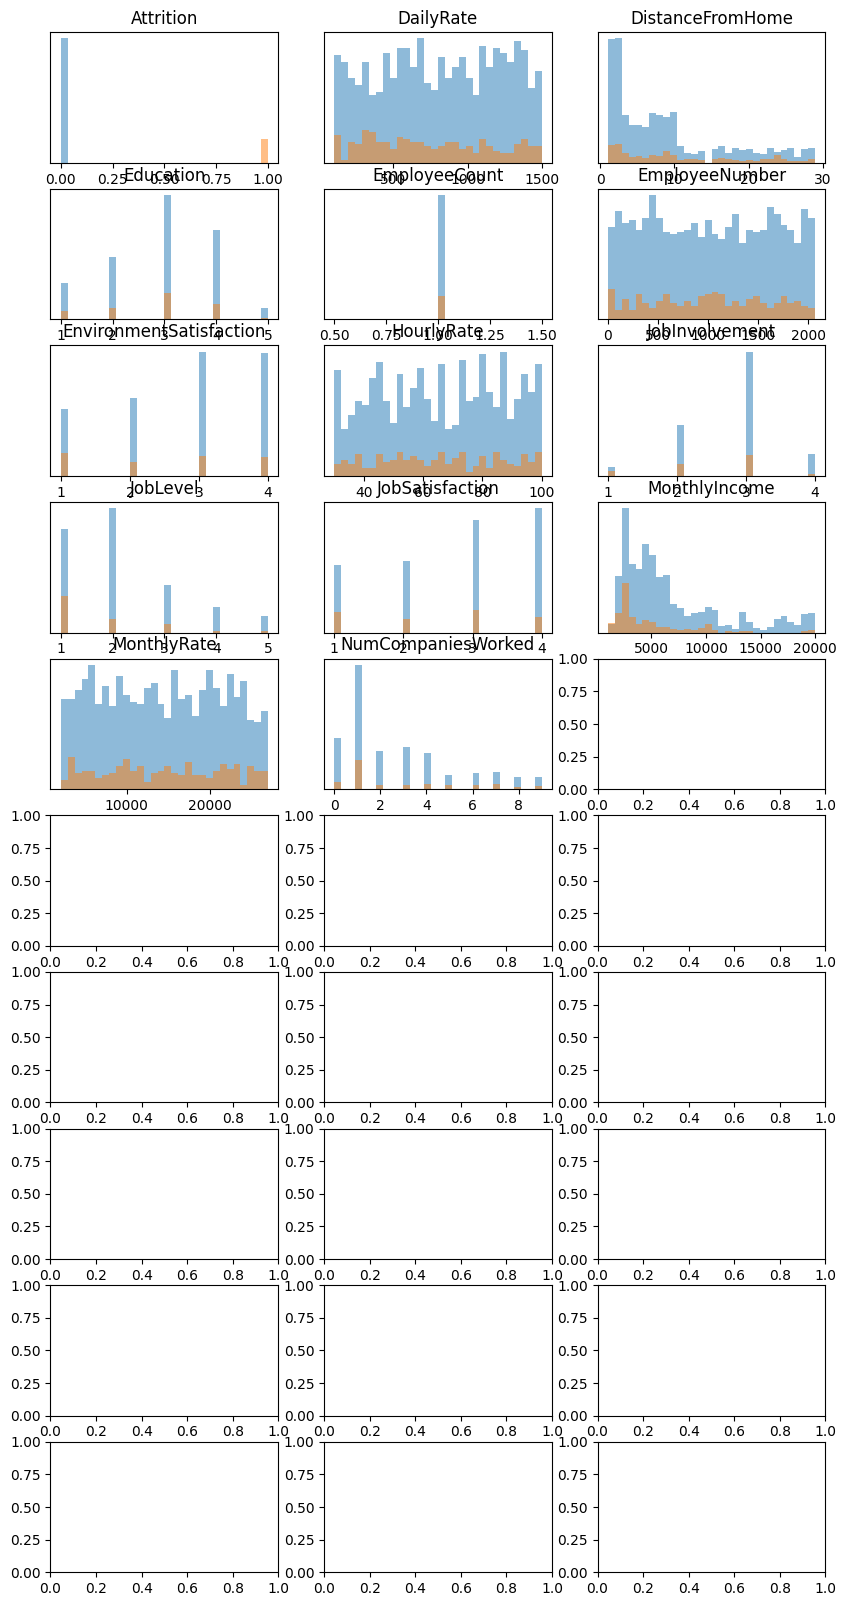

In [38]:
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

zf = ZipFile('archive2.zip')
b = zf.read('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(BytesIO(b))

# Pandasによるデータの表示
# df_target = pd.DataFrame(df["Attrition"], columns=["Attrition"])
# df_data = pd.DataFrame(df["Attrition"], columns=df["feature_names"])
# df = pd.concat([df_target, df_data], axis=1)
# df

df["Attrition"] = df["Attrition"].replace("No", 0)
df["Attrition"] = df["Attrition"].replace("Yes", 1)

droped_df = df.drop("BusinessTravel", axis=1)
droped2_df = droped_df.drop("Department", axis=1)
droped3_df = droped2_df.drop("EducationField", axis=1)
droped4_df = droped3_df.drop("Gender", axis=1)
droped5_df = droped4_df.drop("JobRole", axis=1)
droped6_df = droped5_df.drop("MaritalStatus", axis=1)
df = droped6_df
print(df.head(3))

fig, axes = plt.subplots(10, 3, figsize=(10,20))

# Attritionによるデータフレームのソート
no = df[df["Attrition"] == 0]
yes = df[df["Attrition"] == 1]

ax = axes.ravel()
# 説明変数1~30のグラフ作成、dfはtargetと結合しているためインデックスに注意
for i in range(28):
  _, bins = np.histogram(df.iloc[:,i+1], bins=30)
  ax[i].hist(no.iloc[:,i+1].values, bins=bins, alpha=0.5)
  ax[i].hist(yes.iloc[:,i+1].values, bins=bins, alpha=0.5)
  ax[i].set_title(df.columns[i+1])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["No", "Yes"], loc="best")
fig.tight_layout()

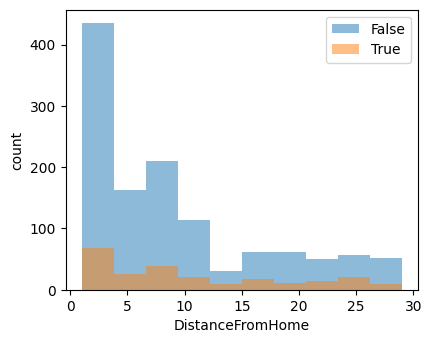

In [10]:
fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.DistanceFromHome[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.DistanceFromHome[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("DistanceFromHome")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

In [7]:
print(df.head(3))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8          

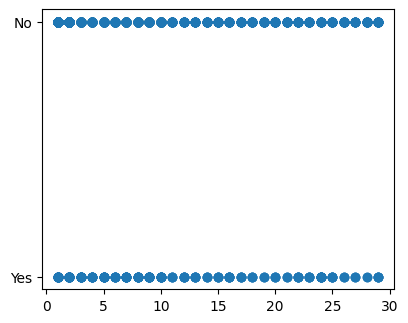

In [8]:
fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.scatter(df["DistanceFromHome"], df["Attrition"])

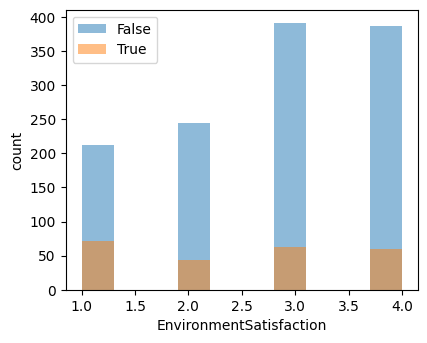

In [40]:
zf = ZipFile('archive2.zip')
b = zf.read('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(BytesIO(b))

fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.EnvironmentSatisfaction[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.EnvironmentSatisfaction[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("EnvironmentSatisfaction")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from zipfile import ZipFile
from io import BytesIO

zf = ZipFile('archive2.zip')
b = zf.read('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(BytesIO(b))

# droped_df = df.drop("BusinessTravel", axis=1)
# droped2_df = droped_df.drop("Department", axis=1)
# droped3_df = droped2_df.drop("EducationField", axis=1)
# droped4_df = droped3_df.drop("Gender", axis=1)
# droped5_df = droped4_df.drop("JobRole", axis=1)
# droped6_df = droped5_df.drop("MaritalStatus", axis=1)
# df = droped6_df

#目的変数はclassで、eが食べれる、pが有毒
df = df[(df["Attrition"] == "Yes") | (df["Attrition"] == "No")]
df["Attrition"] = df["Attrition"].replace("No", 0)
df["Attrition"] = df["Attrition"].replace("Yes", 1)

#カテゴリ変数処理
# droped_df = df.drop("odor", axis=1)
# droped2_df = droped_df.drop("spore-print-color", axis=1)
# print(droped2_df.head(3))
df = pd.get_dummies(df,drop_first = True)

#データ分割
train_data = df.drop("Attrition", axis=1)
y = df["Attrition"].values
X = train_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

#ランダムフォレスト
clf = RandomForestClassifier(random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

score= 0.8616780045351474


In [48]:
dict(zip(train_data.columns, clf.feature_importances_))
a = pd.Series(dict(zip(train_data.columns, clf.feature_importances_)))
a
a.sort_values(ascending=False).head(20)

MonthlyIncome              0.074715
Age                        0.058962
TotalWorkingYears          0.051609
DailyRate                  0.047883
DistanceFromHome           0.047352
MonthlyRate                0.045787
EmployeeNumber             0.044853
OverTime_Yes               0.043283
HourlyRate                 0.041491
YearsAtCompany             0.040975
PercentSalaryHike          0.034071
NumCompaniesWorked         0.033054
EnvironmentSatisfaction    0.029848
StockOptionLevel           0.029260
JobInvolvement             0.027455
YearsWithCurrManager       0.027031
YearsSinceLastPromotion    0.026067
JobSatisfaction            0.025208
TrainingTimesLastYear      0.024687
YearsInCurrentRole         0.022912
dtype: float64

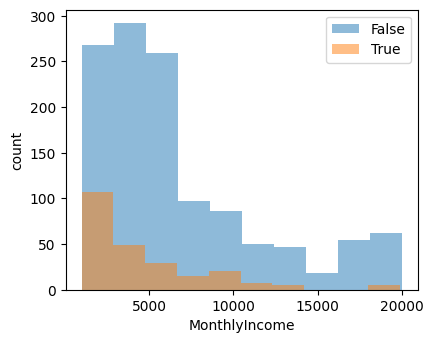

In [50]:
zf = ZipFile('archive2.zip')
b = zf.read('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(BytesIO(b))

fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.MonthlyIncome[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.MonthlyIncome[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("MonthlyIncome")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

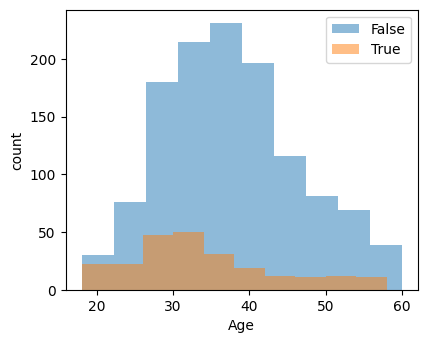

In [51]:
fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.Age[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.Age[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

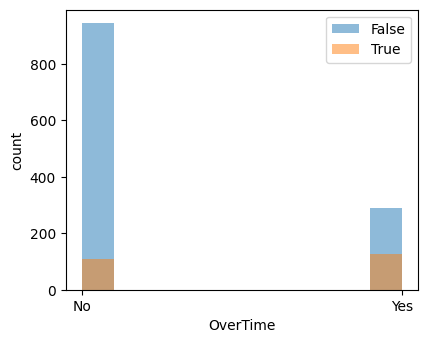

In [52]:
fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.OverTime[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.OverTime[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("OverTime")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

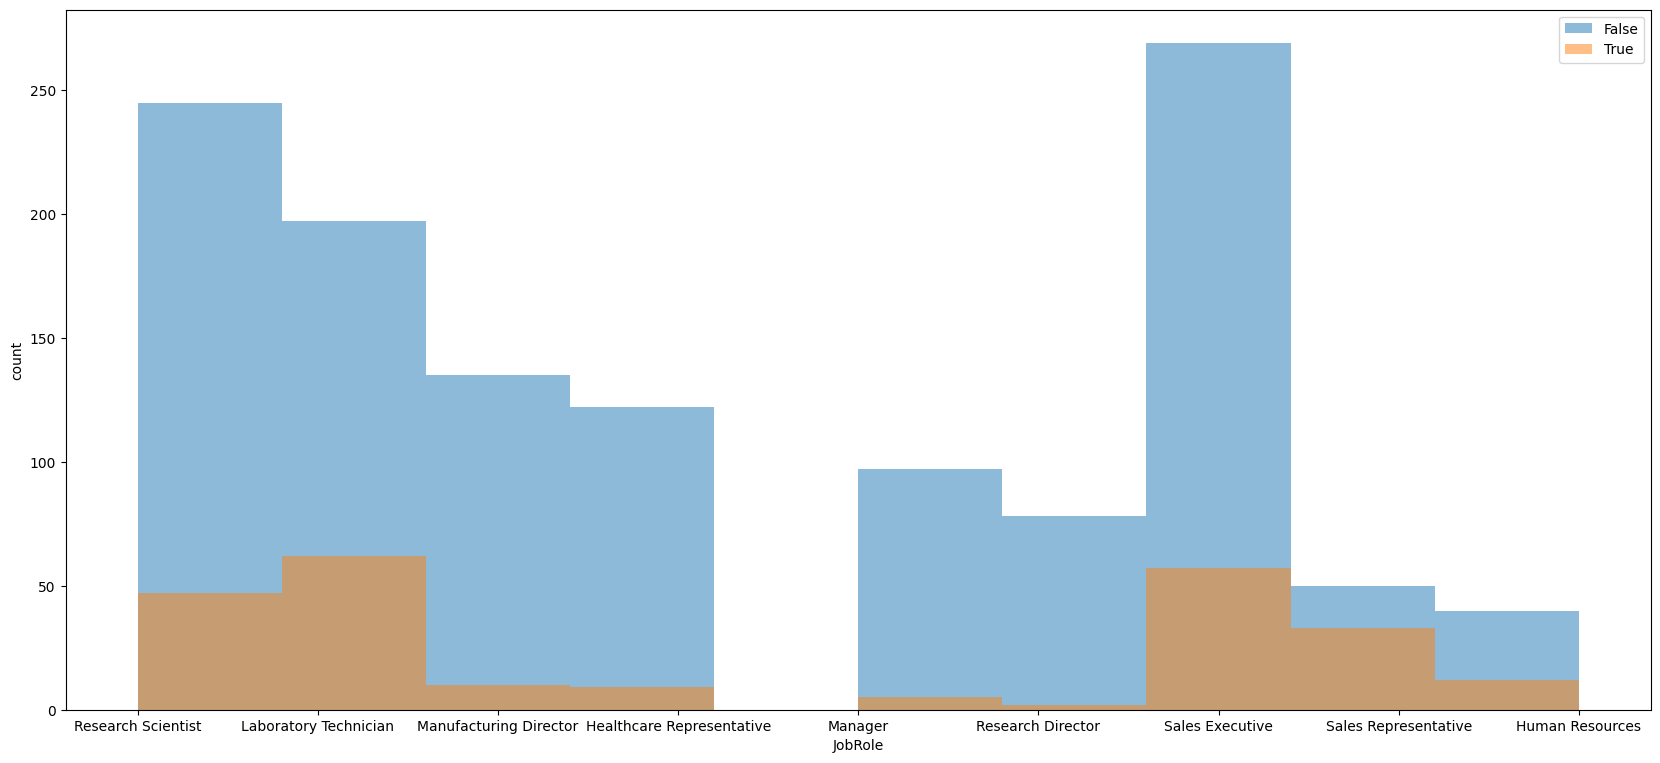

In [60]:
fig = plt.figure(figsize=(45,20))
p1=fig.add_subplot(2,2,1)
p1.hist(df.JobRole[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.JobRole[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("JobRole")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

In [81]:
overtime_yes = df.filter(df["Overtime"]=="No", axis=1)
overtime_yes_attrition_yes = (overtime_yes["Attrition"]=="No").size
ratio = overtime_yes_attrition_yes/overtime_yes
print(overtime_yes)
print(overtime_yes_atrition_yes)
print(ratio)

KeyError: 'Overtime'

In [83]:
df[df["OverTime"] == True & df["Attrition"] == True].size

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [84]:
type(df["OverTime"])

pandas.core.series.Series

In [85]:
type(df["Attrition"])

pandas.core.series.Series

In [86]:
type(df["OverTime"] == True)

pandas.core.series.Series

In [89]:
(df["OverTime"] == True) & (df["Attrition"] == True)

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [98]:
(df[(df["OverTime"] == "Yes") & (df["Attrition"] == "Yes")])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1939,...,1,80,0,8,2,3,4,1,0,3
1395,31,Yes,Travel_Frequently,754,Sales,26,4,Marketing,1,1967,...,3,80,0,10,4,3,10,7,0,8
1396,53,Yes,Travel_Rarely,1168,Sales,24,4,Life Sciences,1,1968,...,2,80,0,15,2,2,2,2,2,2
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2


In [94]:
(df["Attrition"] == True).size

1470

In [96]:
df["OverTime"]

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [97]:
df["Attrition"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [100]:
len(df[(df["OverTime"] == "Yes") & (df["Attrition"] == "Yes")])

127

In [ ]:
残業ありの退職率

In [ ]:
overtime_yes = len(df[df["OverTime"] == "Yes"])
overtime_yes_attrition_yes = len(df[(df["OverTime"] == "Yes") & (df["Attrition"] == "Yes")])
ratio = 100*(overtime_yes_attrition_yes/overtime_yes)
print(overtime_yes)
print(overtime_yes_attrition_yes)
print(ratio)

416
127
30.528846153846157


残業なしの退職率

In [107]:
overtime_no = len(df[df["OverTime"] == "No"])
overtime_no_attrition_yes = len(df[(df["OverTime"] == "No") & (df["Attrition"] == "Yes")])
ratio = 100*(overtime_no_attrition_yes/overtime_no)
print(overtime_no)
print(overtime_no_attrition_yes)
print(ratio)

1054
110
10.436432637571158


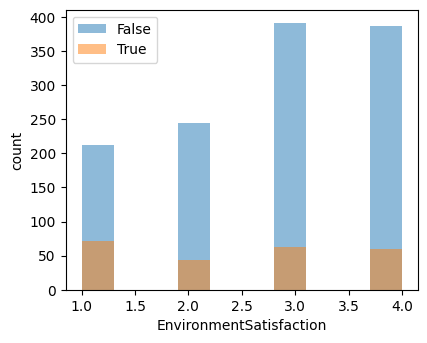

In [109]:
fig = plt.figure(figsize=(10,8))
p1=fig.add_subplot(2,2,1)
p1.hist(df.EnvironmentSatisfaction[df["Attrition"]=="No"], bins=10, alpha=0.5)
p1.hist(df.EnvironmentSatisfaction[df["Attrition"]=="Yes"], bins=10, alpha=0.5)
plt.xlabel("EnvironmentSatisfaction")
plt.ylabel("count")
labels = ["False","True"]
plt.legend(labels)

In [114]:
# 満足度1の退職率
es_1 = len(df[df["EnvironmentSatisfaction"] == 1])
es_1_attrition = len(df[(df["EnvironmentSatisfaction"] == 1) & (df["Attrition"] == "Yes")])
ratio = 100*(es_1_attrition/es_1)
print(es_1)
print(es_1_attrition)
print(ratio)

284
72
25.352112676056336


In [117]:
# 満足度2の退職率
es_2 = len(df[df["EnvironmentSatisfaction"] == 2])
es_2_attrition = len(df[(df["EnvironmentSatisfaction"] == 2) & (df["Attrition"] == "Yes")])
ratio = 100*(es_2_attrition/es_2)
print(es_2)
print(es_2_attrition)
print(ratio)

287
43
14.982578397212542


In [118]:
# 満足度3の退職率
es_3 = len(df[df["EnvironmentSatisfaction"] == 3])
es_3_attrition = len(df[(df["EnvironmentSatisfaction"] == 3) & (df["Attrition"] == "Yes")])
ratio = 100*(es_3_attrition/es_3)
print(es_3)
print(es_3_attrition)
print(ratio)

453
62
13.686534216335541


In [119]:
# 満足度4の退職率
es_4 = len(df[df["EnvironmentSatisfaction"] == 4])
es_4_attrition = len(df[(df["EnvironmentSatisfaction"] == 4) & (df["Attrition"] == "Yes")])
ratio = 100*(es_4_attrition/es_4)
print(es_4)
print(es_4_attrition)
print(ratio)

446
60
13.452914798206278
